<a href="https://colab.research.google.com/github/varunux/Image-classification-using-neural-networks/blob/main/imageclassCNNoverfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:

from tensorflow.keras.datasets import cifar10


In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [4]:

x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

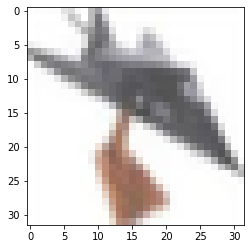

In [6]:

plt.imshow(x_test[215])

In [7]:
cifar10_model=tf.keras.models.Sequential()

In [8]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [9]:

# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [10]:

# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [11]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [12]:

# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
     


In [13]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [14]:

# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [15]:

# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))


In [16]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [17]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [18]:

cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [19]:

cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [20]:

cifar10_model.fit(x_train,y_train,epochs=15)


Epoch 1/15
1563/1563 [==============================] - 304s 194ms/step - loss: 1.4007 - sparse_categorical_accuracy: 0.4923
Epoch 2/15
1563/1563 [==============================] - 300s 192ms/step - loss: 0.9957 - sparse_categorical_accuracy: 0.6456
Epoch 3/15
1563/1563 [==============================] - 301s 193ms/step - loss: 0.8505 - sparse_categorical_accuracy: 0.6985
Epoch 4/15
1563/1563 [==============================] - 300s 192ms/step - loss: 0.7516 - sparse_categorical_accuracy: 0.7349
Epoch 5/15
1563/1563 [==============================] - 300s 192ms/step - loss: 0.6821 - sparse_categorical_accuracy: 0.7588
Epoch 6/15
1563/1563 [==============================] - 297s 190ms/step - loss: 0.6302 - sparse_categorical_accuracy: 0.7763
Epoch 7/15
1563/1563 [==============================] - 300s 192ms/step - loss: 0.5798 - sparse_categorical_accuracy: 0.7944
Epoch 8/15
1563/1563 [==============================] - 300s 192ms/step - loss: 0.5475 - sparse_categorical_accuracy: 0.8065


In [21]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 16s 49ms/step - loss: 0.7224 - sparse_categorical_accuracy: 0.7784


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7784000039100647
